In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Time_series_analysis_and_forecast_DATASET.csv')
data.head(5)


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
data.isnull().values.any()

False

Text(0, 0.5, 'ELecPrice')

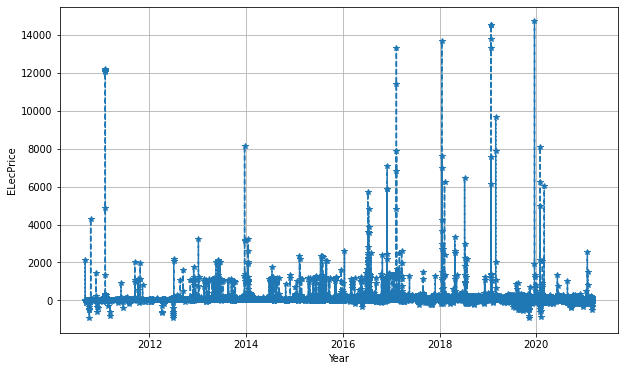

In [5]:
data[ "FullDate" ] = pd.to_datetime(data["FullDate"])
#convert column to datetime 
data.set_index( "FullDate" , inplace= True )
plt.figure(figsize=( 10 , 6 ))
plt.plot(data.index, data.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'ELecPrice' )

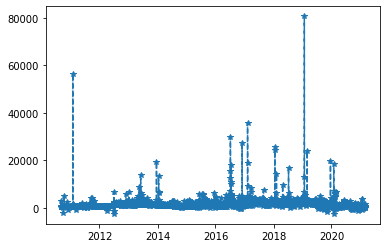

In [6]:
#Upsample to daily data points
data_daily = data.resample('D').sum()
#plt.plot(data_daily.index, data_daily.ElecPrice, '--' , marker= '*' , )
plt.plot(data_daily.ElecPrice, '--' , marker= '*' , )

# Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [7]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(data_daily['SysLoad' ]) 
print(f'ADF Statistic: {adf_result[ 0 ]}') 
print(f'p-value: {adf_result[ 1 ]} ' ) 
print(f'No. of lags used: {adf_result[ 2 ]}') 
print(f'No. of observations used : {adf_result[ 3 ]}') 
print( 'Critical Values:' ) 
for m, n in adf_result[ 4 ].items(): 
 print( f' {m} : {n} ' ) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117 
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [8]:
adf_result = adfuller(data_daily['GasPrice']) 
print(f'ADF Statistic: {adf_result[ 0 ]}') 
print(f'p-value: {adf_result[ 1 ]} ' ) 
print(f'No. of lags used: {adf_result[ 2 ]}') 
print(f'No. of observations used : {adf_result[ 3 ]}') 
print( 'Critical Values:' ) 
for m, n in adf_result[ 4 ].items(): 
 print( f' {m} : {n} ' )

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542 
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [9]:
adf_result = adfuller(data_daily['ElecPrice']) 
print(f'ADF Statistic: {adf_result[ 0 ]}') 
print(f'p-value: {adf_result[ 1 ]} ' ) 
print(f'No. of lags used: {adf_result[ 2 ]}') 
print(f'No. of observations used : {adf_result[ 3 ]}') 
print( 'Critical Values:' ) 
for m, n in adf_result[ 4 ].items(): 
 print( f' {m} : {n} ' ) 

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13 
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [10]:
x_test = data_daily.tail(2757)
x_train = data_daily[:-2757]

In [11]:
data_daily.dtypes

Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [14]:
data_daily.reset_index(inplace=True)


In [15]:
# Preparing the data for univariate analysis
df_uni = data_daily[["FullDate",'ElecPrice']]
# making a new dataframe from df_daily by renaming the columns
new_df = df_uni.rename(columns={"FullDate": "ds", "ElecPrice": "y"})

In [16]:
from fbprophet import Prophet
x_test_uni = new_df.tail(1077)
x_train_uni = new_df[:-1077]

In [17]:
# building the model
model = Prophet()
# fitting the model
model.fit(x_train_uni)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = model.make_future_dataframe(periods=1077 , freq= 'D' )
result_uni = model.predict(future)

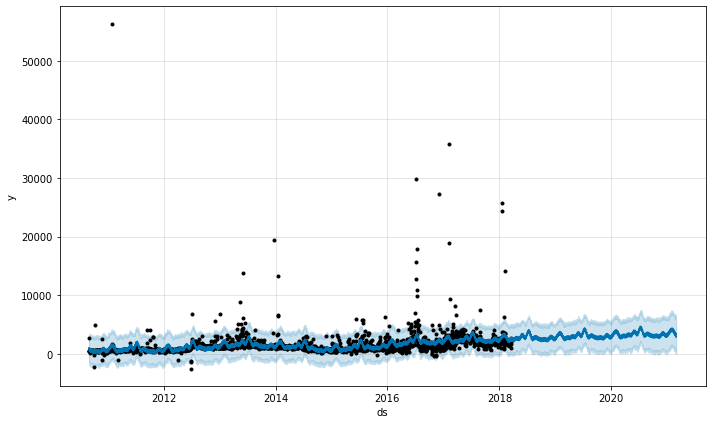

In [19]:
# Plotting the Graph
model.plot(result_uni)
plt.show()

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places? Hint: Define a function that calculates the Mape using the definition of MAPE from the course Module and pass your dataset into it

In [36]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
mean_absolute_percentage_error(x_test_uni['y'], result_uni['yhat'][-1077:])
round(549.4751413716547,2)

549.48

What is the RMSE in 2 decimal places?

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(x_test_uni['y'], result_uni['yhat'][-1077:]))
print(rmse)

3218.15577651241


If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

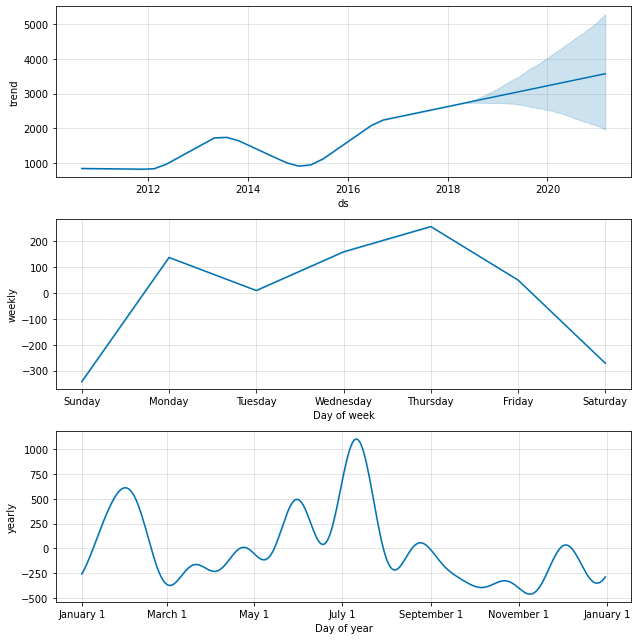

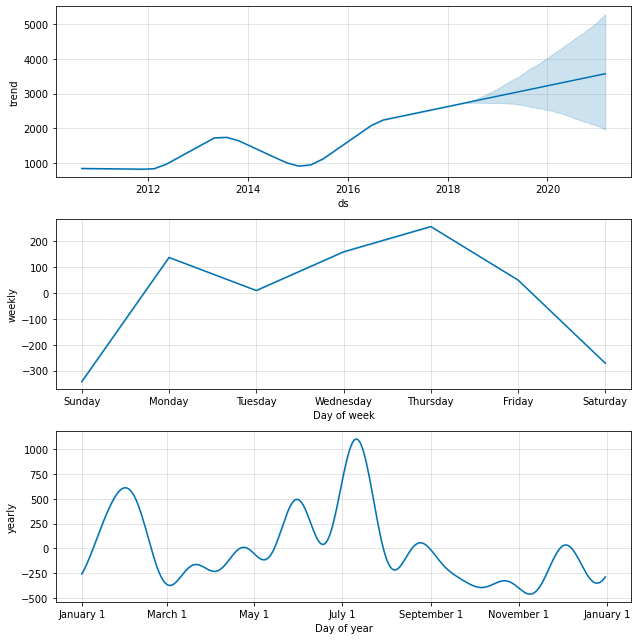

In [23]:
model.plot_components(result_uni)

In [24]:
#Multivariate Analysis

new_df = data_daily.copy()
# making a new dataframe from df_daily & renaming the columns

new_df_mul= new_df.rename(columns={"FullDate": "ds", "ElecPrice": "y","SysLoad": "add1","Tmax": "add2","GasPrice": "add3",})

In [25]:
# Train Test Split
x_test_multi = new_df_mul.tail(1077)
x_train_multi = new_df_mul[:-1077]

In [26]:
# Building Model - Prophet & Adding regressors
model_multi = Prophet()
model_multi.add_regressor('add1')
model_multi.add_regressor('add2')
model_multi.add_regressor('add3')

In [27]:
model_multi.fit(x_train_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_multi = model_multi.make_future_dataframe(periods=1077,freq='D')
future_multi['add1'] = new_df_mul['add1'].values
future_multi['add2'] = new_df_mul['add2'].values
future_multi['add3'] = new_df_mul['add3'].values
result_multi= model_multi.predict(future_multi)

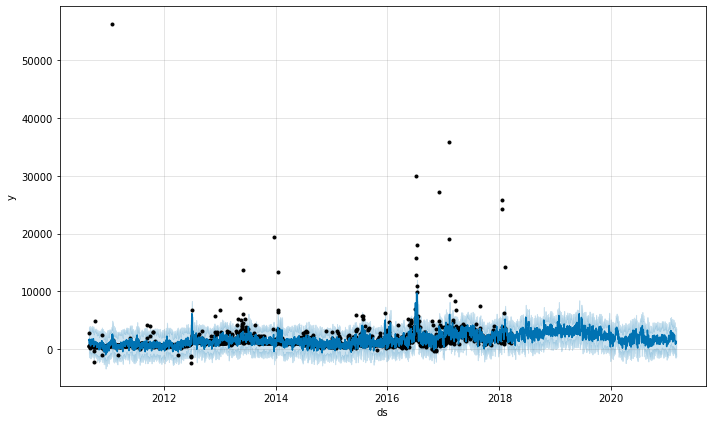

In [29]:
model_multi.plot(result_multi)
plt.show()

Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [31]:
# MAPE
mean_absolute_percentage_error=mean_absolute_percentage_error( x_test_multi['y'][-1077:], result_multi['yhat'][-1077:])
round(mean_absolute_percentage_error,2)

233.74

In [ ]:
round()

What is the RMSE in 2 decimal places?

In [41]:
rmse_multi = sqrt(mean_squared_error( x_test_multi['y'][-1077:], result_multi['yhat'][-1077:]))
print(rmse_multi)
round(rmse_multi,2)

2709.6493421662344


2709.65

If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

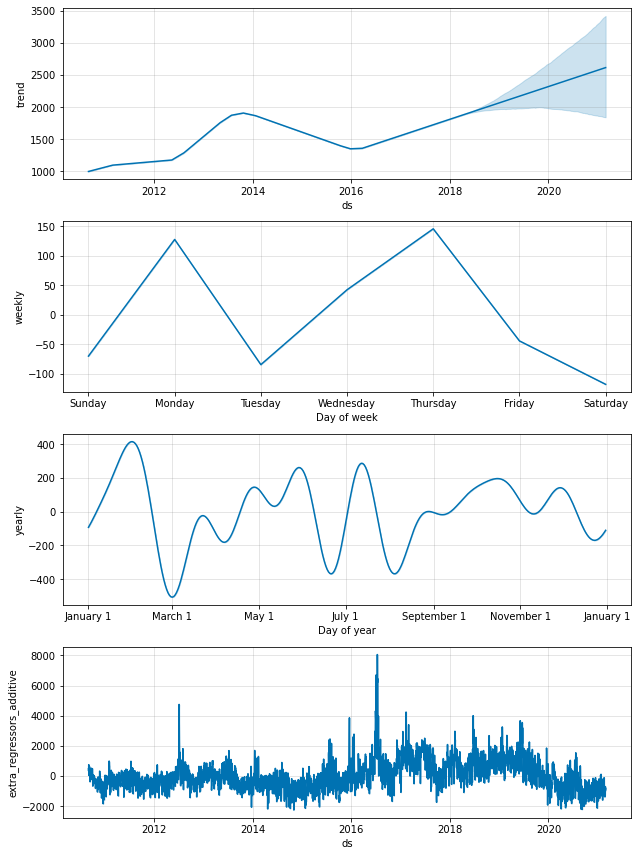

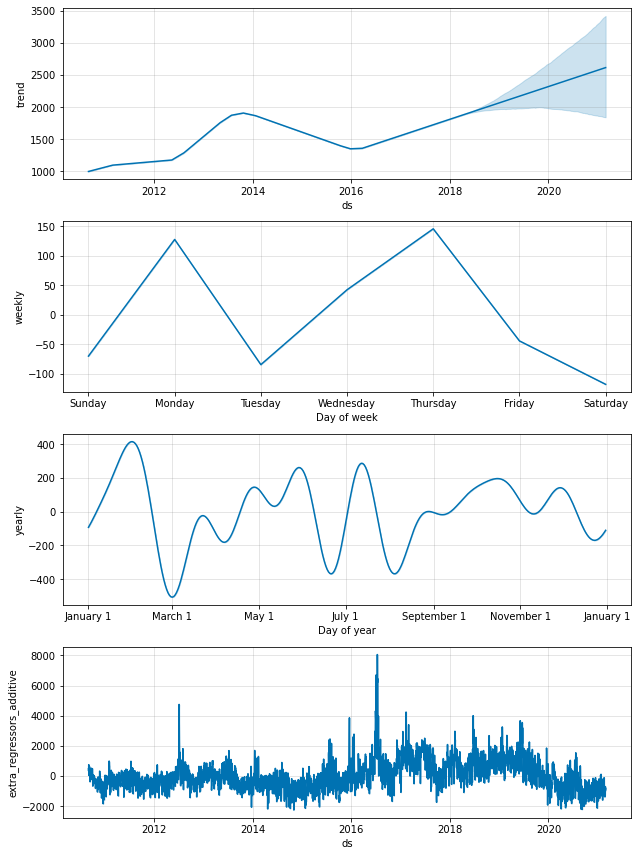

In [42]:
model_multi.plot_components(result_multi)

Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [43]:
new_df_mul= new_df.rename(columns={"FullDate": "ds", "ElecPrice": "y","SysLoad": "add1","GasPrice": "add3",})

In [44]:
# Train Test Split
x_test_multi = new_df_mul.tail(1077)
x_train_multi = new_df_mul[:-1077]

In [45]:
# Building Model - Prophet & Adding regressors
model_multi = Prophet()
model_multi.add_regressor('add1')
#model_multi.add_regressor('add2')
model_multi.add_regressor('add3')

In [46]:
model_multi.fit(x_train_multi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future_multi = model_multi.make_future_dataframe(periods=1077,freq='D')
future_multi['add1'] = new_df_mul['add1'].values
future_multi['add3'] = new_df_mul['add3'].values
result_multi= model_multi.predict(future_multi)

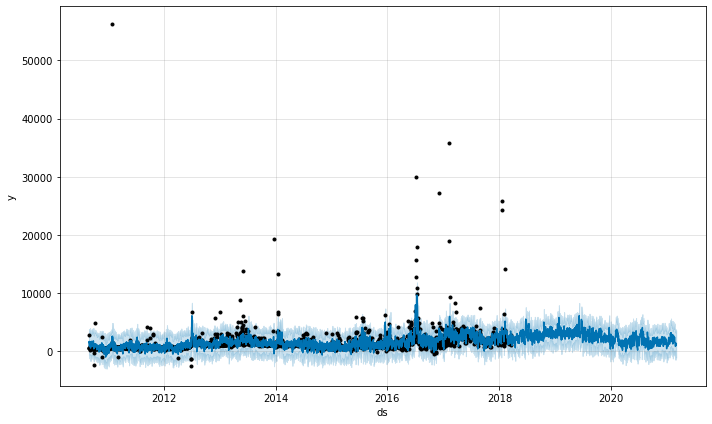

In [51]:
model_multi.plot(result_multi)
plt.show()

In [71]:
# MAPE
def mean_absolute_percentage_error1(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [73]:
ans =mean_absolute_percentage_error1( x_test_multi['y'][-1077:], result_multi['yhat'][-1077:])
round(ans,2)

236.66